### Data Cleaning


In [12]:
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords
import seaborn as sns

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


nlp=spacy.load('en_core_web_sm')
nltk.download('punkt')  
nltk.download('stopwords') 

stop_words = set(stopwords.words('english'))
stop_words = [i for i in stop_words if i not in ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]]



df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin',
              header = None)

df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace=True)




[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [14]:
nlp=spacy.load('en_core_web_sm')
nltk.download('punkt')  
nltk.download('stopwords') 

stop_words = set(stopwords.words('english'))
stop_words = [i for i in stop_words if i not in ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]]


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


In [15]:

df['labels'] = df['labels'].replace(4, 1)

df = df.sample(frac=1)
df = df.head(10000)

In [14]:
df.head(10)

,labels,tweets
795190,0,Yardwork by myself Good Morning ya'll http://...
1384598,1,really needs to shower and get ready
993774,1,finished reading The Man in my Basement. Very ...
824710,1,@laraslattery pleasure
1245031,1,Glad my headaches going away now
1406132,1,is getting ready for a call back and going to ...
154618,0,@darkzoo I hope no more shows get cancelled
1015529,1,Seeking solace in coffee..... mmm
1472348,1,@tylermckenzie that's amazing Tyler! keep up ...
1417088,1,"@elTweeno ah, I get the hang of it someday ot..."


In [16]:
def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    tokens = [token.lemma_ for token in nlp(tweet)]
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    processed_tweet = ' '.join(tokens)
    
    return processed_tweet

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)



100%|██████████| 10000/10000 [01:26<00:00, 116.25it/s]


In [16]:
df.head()

,labels,tweets,clean_tweets,tweet_words_length,tweet_chars_length
795190,0,Yardwork by myself Good Morning ya'll http://...,yardwork good morning,3,21
1384598,1,really needs to shower and get ready,really need shower get ready,5,28
993774,1,finished reading The Man in my Basement. Very ...,finish read man basement good big bag book mot...,14,70
824710,1,@laraslattery pleasure,pleasure,1,8
1245031,1,Glad my headaches going away now,glad headache go away,4,21


### EDA


In [17]:
positive_count = df[df['labels'] == 1].shape[0]
negative_count = df[df['labels'] == 0].shape[0]

fig = px.pie(
    values=[positive_count, negative_count],  # Values represent the counts of positive and negative tweets
    title='Distribution of Positive and Negative Tweets',  # Title of the pie chart
    names=['Positive', 'Negative'],  # Labels for the two categories
    hover_name=['Positive', 'Negative'],  # Hover information for each category
    opacity=.9,  # Opacity of the pie chart
    template='simple_white'  # Plotly template for the chart
)

fig.show()

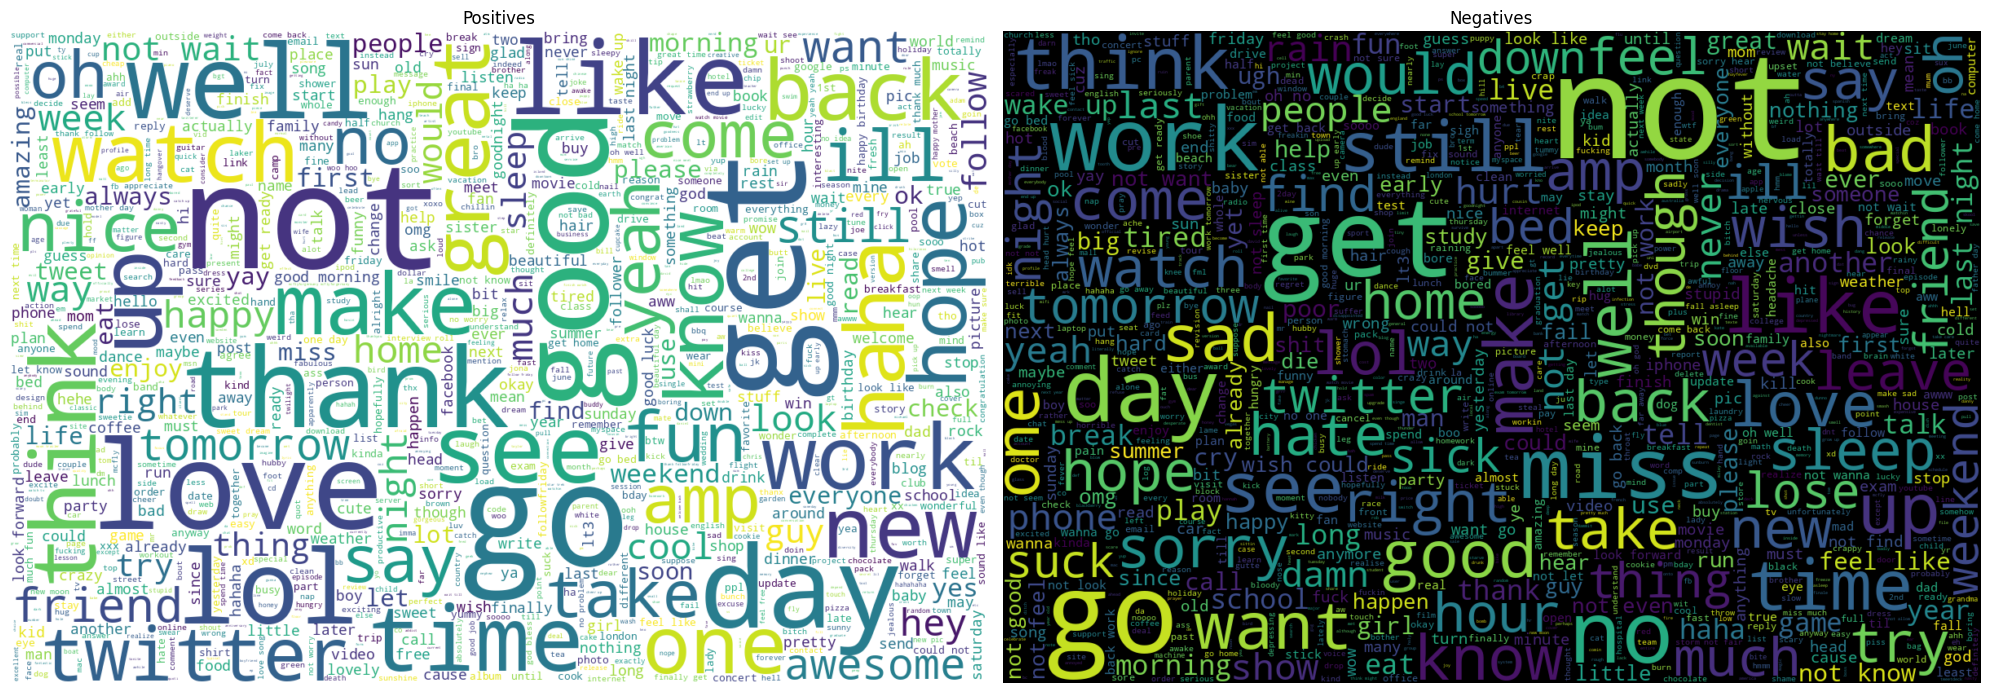

In [18]:
plt.figure(figsize=(20, 8))

STOPWORDS = ['im','today','really','need','tonight']

plt.subplot(1, 2, 1)

wordcloud_1 = WordCloud(
    width=1200, height=800, max_words=1000, contour_width=2,
    background_color='white', stopwords=STOPWORDS, max_font_size=180,
    colormap='viridis'
).generate(' '.join(df[df['labels'] == 1]['clean_tweets']))

plt.imshow(wordcloud_1, interpolation='bilinear')
plt.axis('off')
plt.title('Positives')

plt.subplot(1, 2, 2)

wordcloud_2 = WordCloud(
    width=1200, height=800, max_words=1000, contour_width=2,
    background_color='black', stopwords=STOPWORDS, max_font_size=180,
    colormap='viridis'
).generate(' '.join(df[df['labels'] == 0]['clean_tweets']))

plt.imshow(wordcloud_2, interpolation='bilinear')
plt.axis('off')
plt.title('Negatives')

plt.axis('off')

plt.tight_layout()

plt.show()

In [19]:
fig_words = ff.create_distplot(
    [df[df['labels'] == 1]['tweet_words_length'], df[df['labels'] == 0]['tweet_words_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

fig_chars = ff.create_distplot(
    [df[df['labels'] == 1]['tweet_chars_length'], df[df['labels'] == 0]['tweet_chars_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

fig_chars.update_layout(title=" Character Count", xaxis_title="Number of Characters", yaxis_title="Frequency")
fig_words.update_layout(title="Word Count", xaxis_title="Number of Words", yaxis_title="Frequency")

fig = make_subplots(rows=1, cols=2, subplot_titles=["Word Count", "Character Count"])
fig.add_trace(fig_words['data'][0], row=1, col=1)
fig.add_trace(fig_words['data'][1], row=1, col=1)
fig.add_trace(fig_chars['data'][0], row=1, col=2)
fig.add_trace(fig_chars['data'][1], row=1, col=2)

fig.update_layout(title_text="Word Count vs Character Count", showlegend=True, font=dict(family="Arial", size=15, color="black"))
fig.show()

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['clean_tweets'], df['labels'], test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

fig = px.pie(values=[len(x_train), len(x_test), len(x_val)], title='Distribution of Training, Testing, and Validation Tweets', 
             names=['Training', 'Testing', 'Validation'], hover_name=['Training', 'Testing', 'Validation'], opacity=0.9, template='simple_white')

fig.show()

### Neural Network

In [21]:
df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin',
              header = None)

df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace=True)
df['labels'] = df['labels'].replace(4, 1)

df = df.sample(frac=1)
df = df.head(20000)

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)


100%|██████████| 20000/20000 [03:00<00:00, 110.57it/s]


In [22]:
df

,labels,tweets,clean_tweets,tweet_words_length,tweet_chars_length
43245,0,"Um, why is it so cold in LA?!?! I already miss...",um cold la already miss sun,6,27
1417854,1,txt it 9390042 or give me ur number,txt 9390042 give ur number,10,31
734553,0,@dawnipoo I stole your last 3 pounds,steal last pound,3,16
1234083,1,"ok, so NOW I have Doctor Who on",ok doctor,2,9
638447,0,"@lauria I don't actually have any, just wishfu...",not actually wishful tweet sorry,5,32
...,...,...,...,...,...
916830,1,"@mcrmy_lisa ...one online? Yeah, me",one online yeah,3,15
1448094,1,So i walk into my room and find Jemma Kidd lip...,walk room find jemma kidd lipstick pillow than...,9,51
420474,0,Has cooked and eaten beehoon and now wondering...,cook eat beehoon wonder anyone help iron clothe,8,47
918759,1,@alucinari Moral support for students,moral support student,3,21


### One Hot Encoder

In [23]:
vec=CountVectorizer(binary=True)
vec.fit(df['clean_tweets'])

enc_tweets=vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

In [24]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


layer_1=model.fit(x_train,y_train , epochs=2, batch_size=64, validation_data=(x_val,y_val))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 137ms/step - accuracy: 0.6286 - loss: 0.6369 - val_accuracy: 0.7485 - val_loss: 0.5043
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 135ms/step - accuracy: 0.8309 - loss: 0.4051 - val_accuracy: 0.7575 - val_loss: 0.5223


In [25]:
model.evaluate(x_test,y_test)[1]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7349 - loss: 0.5458


0.7319999933242798

### Count Vectorizer

In [26]:
vec=CountVectorizer(binary=False)
vec.fit(df['clean_tweets'])

enc_tweets=vec.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


layer_2=model.fit(x_train,y_train , epochs=2, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 65s 253ms/step - accuracy: 0.6270 - loss: 0.6389 - val_accuracy: 0.7580 - val_loss: 0.5137
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 137ms/step - accuracy: 0.8163 - loss: 0.4216 - val_accuracy: 0.7520 - val_loss: 0.5533


In [27]:
model.evaluate(x_test,y_test)[1]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7468 - loss: 0.5843


0.7394999861717224

### TfidfVectorizer

In [28]:
tfidf=TfidfVectorizer()

enc_tweets=tfidf.fit_transform(df['clean_tweets']).toarray()

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=0.2, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(enc_tweets.shape[1],)))
model.add(Dropout(.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


layer_3=model.fit(x_train,y_train , epochs=2, batch_size=64, validation_data=(x_val,y_val))

Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 36s 137ms/step - accuracy: 0.6091 - loss: 0.6449 - val_accuracy: 0.7435 - val_loss: 0.5209
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 136ms/step - accuracy: 0.8410 - loss: 0.3897 - val_accuracy: 0.7415 - val_loss: 0.5364


In [29]:
model.evaluate(x_test,y_test)[1]

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7508 - loss: 0.5309


0.7484999895095825

In [30]:
layer_1.history


{'accuracy': [0.6888124942779541, 0.8238124847412109],
 'loss': [0.5875639915466309, 0.4148828089237213],
 'val_accuracy': [0.7484999895095825, 0.7574999928474426],
 'val_loss': [0.5043320059776306, 0.522305428981781]}

### Index-Based-Encoding


In [9]:
import pandas as pd
from tqdm import tqdm

In [17]:
df=pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding='latin',
              header = None)

df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)
df.drop([1,2,3,4], axis=1, inplace=True)
df['labels'] = df['labels'].replace(4, 1)

df = df.sample(frac=1)
df = df.head(20000)

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

100%|██████████| 20000/20000 [02:48<00:00, 119.04it/s]


In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
df['tweet_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweet_chars_length'] = df['clean_tweets'].apply(get_char_len)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweets'])

word_index = tokenizer.word_index
index_word = tokenizer.index_word

sequences = tokenizer.texts_to_sequences(df['clean_tweets'])
enc_tweets = pad_sequences(sequences, maxlen=20, padding='post')

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=0.8, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)


model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(20,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

layer_4 = model.fit(x_train, y_train, epochs=2, batch_size=32, validation_data=(x_val, y_val))

print('\n')
print("Model Evaluation on Testing Data:", round(model.evaluate(x_test, y_test)[1] * 100, 2))

Epoch 1/2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5083 - loss: 213.0770 - val_accuracy: 0.5151 - val_loss: 71.2880
Epoch 2/2
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5270 - loss: 52.8863 - val_accuracy: 0.5064 - val_loss: 48.6607


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5011 - loss: 46.6213
Model Evaluation on Testing Data: 49.9


### adding Embedding layer

In [22]:
epochs_ = 10          
seq_len = 20          
batch_size_ = 64     
training_size = .8     
embedding_len = 100 

In [23]:
from tensorflow.keras.layers import Dense, Dropout,Embedding, Flatten
from tensorflow.keras.optimizers import Adam

from tensorflow.keras import Sequential

In [37]:

model = Sequential()

model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_len, input_length=seq_len))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

layer_5 = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(x_val, y_val))
print('\n')
print("Model Evaluation on Testing Data: ", round(model.evaluate(x_test, y_test)[1] * 100, 2))

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.5127 - loss: 0.6929 - val_accuracy: 0.5346 - val_loss: 0.6913
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5997 - loss: 0.6874 - val_accuracy: 0.5476 - val_loss: 0.6885
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6164 - loss: 0.6784 - val_accuracy: 0.5745 - val_loss: 0.6836
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6768 - loss: 0.6609 - val_accuracy: 0.6071 - val_loss: 0.6711
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7679 - loss: 0.6247 - val_accuracy: 0.6409 - val_loss: 0.6493


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6266 - loss: 0.6524
Model Evaluation on Testing Data:  64.07


### LSTM 

In [38]:
from tensorflow.keras.layers import SimpleRNN

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_len, input_length=seq_len))
model.add(LSTM(units=128, dropout=0.2, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

layer_6 = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(x_val, y_val))

print('\n')

print("Model Evaluation on Testing Data:", round(model.evaluate(x_test, y_test)[1] * 100, 2))

model.save('LSTM.h5')

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 92ms/step - accuracy: 0.5036 - loss: 0.6935 - val_accuracy: 0.5119 - val_loss: 0.6929
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5147 - loss: 0.6928 - val_accuracy: 0.5305 - val_loss: 0.6925
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5360 - loss: 0.6919 - val_accuracy: 0.5470 - val_loss: 0.6897
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - accuracy: 0.5927 - loss: 0.6815 - val_accuracy: 0.6637 - val_loss: 0.6129
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.7656 - loss: 0.5130 - val_accuracy: 0.6935 - val_loss: 0.5851
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8192 - loss: 0.4304 - val_accuracy: 0.7034 - val_loss: 0.5924
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.8613 - loss: 0.3523 - val_accuracy: 0.7023 - val_loss: 0.6120
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8895 - loss: 0.2985 - val_accuracy: 0.6864 - 

### GRU


In [3]:
from tensorflow.keras.layers import GRU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [25]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_len, input_length=seq_len))
model.add(GRU(units=128, dropout=0.2, return_sequences=True))
model.add(GRU(64))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

layer_7 = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(x_val, y_val))


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - accuracy: 0.4906 - loss: 0.6937 - val_accuracy: 0.4933 - val_loss: 0.6934
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5219 - loss: 0.6927 - val_accuracy: 0.4935 - val_loss: 0.6936
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5115 - loss: 0.6931 - val_accuracy: 0.4935 - val_loss: 0.6936
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 84ms/step - accuracy: 0.5047 - loss: 0.6930 - val_accuracy: 0.4934 - val_loss: 0.6932
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5207 - loss: 0.6924 - val_accuracy: 0.4936 - val_loss: 0.6934
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.5178 - loss: 0.6926 - val_accuracy: 0.4935 - val_loss: 0.6930
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.4964 - loss: 0.6936 - val_accuracy: 0.4936 - val_loss: 0.6932
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.5214 - loss: 0.6925 - val_accuracy: 0.5294 -

In [26]:
model.evaluate(x_test,y_test)

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5944 - loss: 0.6877


[0.6876567602157593, 0.5842499732971191]

### Implementing Bidirectional layer

In [30]:
from tensorflow.keras.layers import Bidirectional

In [28]:
model = Sequential()
model.add(Embedding(input_dim=len(word_index) + 1, output_dim=embedding_len, input_length=seq_len))
model.add(Bidirectional(GRU(units=128, dropout=0.2, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

layer_8 = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(x_val, y_val))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 147ms/step - accuracy: 0.5203 - loss: 0.6922 - val_accuracy: 0.5180 - val_loss: 0.6922
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.5527 - loss: 0.6904 - val_accuracy: 0.5773 - val_loss: 0.6877
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.6235 - loss: 0.6795 - val_accuracy: 0.6264 - val_loss: 0.6667
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 133ms/step - accuracy: 0.6949 - loss: 0.6310 - val_accuracy: 0.6842 - val_loss: 0.5924
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - accuracy: 0.7817 - loss: 0.4843 - val_accuracy: 0.7032 - val_loss: 0.5867
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8462 - loss: 0.3606 - val_accuracy: 0.7016 - val_loss: 0.6218
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 128ms/step - accuracy: 0.8800 - loss: 0.2993 - val_accuracy: 0.6946 - val_loss: 0.6971
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.9029 - loss: 0.2570 - val_accuracy:

In [29]:
print("Model Evaluation on Testing Data: ", round(model.evaluate(x_test, y_test)[1] * 100, 2))

250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6866 - loss: 0.8562
Model Evaluation on Testing Data:  69.25


## Neural network with Custom Word2Vec


In [42]:
from nltk.tokenize import word_tokenize

from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D


In [34]:
epochs_ = 12  # Number of epochs for training
seq_len = 20  # Maximum sequence length for padding
batch_size_ = 1024  # Batch size for training
training_size = .8  # Percentage of data used for training
embedding_len = 300  # Length of word embeddings

def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    tokens = word_tokenize(tweet)
    tokens = [token for token in tokens if token not in stop_words]
    tokens = [token for token in tokens if len(token) > 1]
    processed_tweet = ' '.join(tokens)
    return processed_tweet

df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding="latin", header=None, on_bad_lines='skip')
df.rename(columns={0: 'labels', 5: 'tweets'}, inplace=True)
df.drop([1, 2, 3, 4], axis=1, inplace=True)
df['labels'] = df['labels'].replace(4, 1)  
df = df.sample(frac=1)  
df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_tweets'])
word_index = tokenizer.word_index  
index_word = tokenizer.index_word  

sequences = tokenizer.texts_to_sequences(df['clean_tweets'])  
enc_tweets = pad_sequences(sequences, maxlen=seq_len, padding='post') 

x_train, x_test, y_train, y_test = train_test_split(enc_tweets, df['labels'], test_size=training_size, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

100%|██████████| 1600000/1600000 [04:18<00:00, 6187.80it/s]


In [38]:


word2vec = Word2Vec(list(map(lambda x: word_tokenize(x), df['clean_tweets'])),
                    vector_size=embedding_len,  
                    workers=8, 
                    min_count=1) 

print("Vocabulary Length:", len(word2vec.wv.key_to_index))

Vocabulary Length: 447647


In [39]:
embedding_matrix = np.zeros((len(word2vec.wv.key_to_index), embedding_len))

for word, token in tokenizer.word_index.items():
    if word2vec.wv.__contains__(word):
        embedding_matrix[token] = word2vec.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

Embedding Matrix Shape: (447647, 300)


In [43]:
model = Sequential() 

model.add(Embedding(input_dim=len(word2vec.wv.key_to_index),  
                    output_dim=embedding_len,  
                    weights=[embedding_matrix],  
                    input_length=seq_len,  
                    trainable=False)) 

model.add(Conv1D(128, 5, activation='relu')) 
model.add(GlobalMaxPooling1D()) 
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid'))  
model.compile(loss='binary_crossentropy',  
              optimizer=Adam(learning_rate=0.0001), 
              metrics=['accuracy'])  

layer_9 = model.fit(x_train, y_train, epochs=epochs_, batch_size=batch_size_, validation_data=(x_val, y_val))

print('\n')
print("Model Evaluation on Testing Data:", round(model.evaluate(x_test, y_test)[1] * 100, 2))

Epoch 1/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 84s 263ms/step - accuracy: 0.6639 - loss: 0.6252 - val_accuracy: 0.7603 - val_loss: 0.4955
Epoch 2/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 262ms/step - accuracy: 0.7618 - loss: 0.4970 - val_accuracy: 0.7724 - val_loss: 0.4760
Epoch 3/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 81s 261ms/step - accuracy: 0.7734 - loss: 0.4784 - val_accuracy: 0.7782 - val_loss: 0.4665
Epoch 4/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 256ms/step - accuracy: 0.7844 - loss: 0.4611 - val_accuracy: 0.7812 - val_loss: 0.4613
Epoch 5/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 82s 261ms/step - accuracy: 0.7885 - loss: 0.4534 - val_accuracy: 0.7841 - val_loss: 0.4564
Epoch 6/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 80s 255ms/step - accuracy: 0.7921 - loss: 0.4443 - val_accuracy: 0.7852 - val_loss: 0.4543
Epoch 7/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 83s 258ms/step - accuracy: 0.7973 - loss: 0.4371 - val_accuracy: 0.7869 - val_loss: 0.4519
Epoch 8/12
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 279ms/step - accuracy: 0.8002 - loss: 0